# Análisis de datos con Pyhon - Pre-entrega
Nombre y apellido: Mariano Vanini

# Etapa 1

## Script básico
1- Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.

2- Realizar un script básico que calcule las ventas mensuales utilizando variables y operadores.

3- Desarrollar un programa que almacene los datos de ventas (producto, precio, cantidad). Decidir si conviene utilizar diccionarios o listas.

In [2]:
# Generamos una lista de diccionarios que contenga algunos datos
ventas = [
  {'producto': 'notebook', 'precio': 1500.0, 'cantidad': 3},
  {'producto': 'monitor', 'precio': 500.0, 'cantidad': 5},
  {'producto': 'mouse', 'precio': 20.0, 'cantidad': 15}
]

In [3]:
# Calculamos las ventas acumuladas - map
total = sum(map(lambda v: v['precio'] * v['cantidad'], ventas))
print(total)

7300.0


In [4]:
# Calculamos las ventas acumuladas - listas por comprensión
venta_acumuladas = sum([venta["precio"] * venta["cantidad"] for venta in ventas])
venta_acumuladas

7300.0

3- Estructuras de Datos: Desarrollar un programa que almacene los datos de ventas (producto, precio, cantidad). Decidir si conviene utilizar diccionarios o listas.

 Conviene utilizar una  **lista de diccionarios** para representar filas de datos con multiples atributos, ya que cada elemento tiene un contexto y  es facil de convertir a Dataframe

Ventas mensuales:


,fecha_venta,total
0,2024-01-01,129604.99
1,2024-02-01,118672.44
2,2024-03-01,136779.15
3,2024-04-01,144380.10
4,2024-05-01,143727.25
5,2024-06-01,108480.17
6,2024-07-01,116229.97
7,2024-08-01,119680.15
8,2024-09-01,115787.85
9,2024-10-01,112117.13


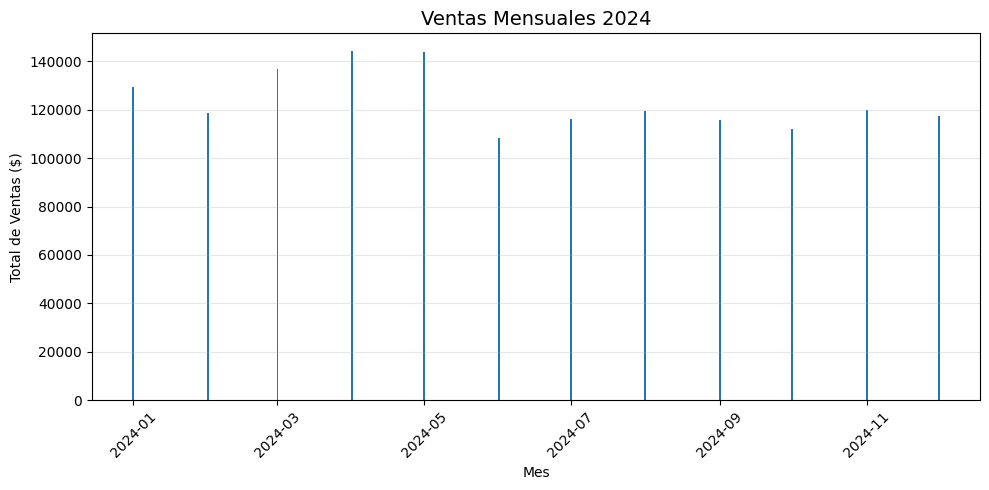

In [5]:
# importo el dataset de ventas y calculo las ventas totales
import pandas as pd
import matplotlib.pyplot as plt

#  Cargo los datos de ventas
ventas = pd.read_csv("https://raw.githubusercontent.com/marianovanini/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/Pre%20entrega/Datasets/ventas.csv")

#  Ajusto caracteres especiales en los precios
ventas['precio'] = ventas['precio'].replace('[$,]', '', regex=True).astype(float)

#  Conversión de fechas
ventas['fecha_venta'] = pd.to_datetime(ventas['fecha_venta'], format='%d/%m/%Y')

#  Calculo total por venta
ventas['total'] = ventas['precio'] * ventas['cantidad']

#  Agrupo por mes
ventas_mensuales = (
    ventas.groupby(ventas['fecha_venta'].dt.to_period('M'))['total']
    .sum()
    .reset_index()
)

# Convierto la fecha
ventas_mensuales['fecha_venta'] = ventas_mensuales['fecha_venta'].dt.to_timestamp()

#  Muestro tabla
print("Ventas mensuales:")
display(ventas_mensuales)

#  Grafico
plt.figure(figsize=(10,5))
plt.bar(ventas_mensuales['fecha_venta'], ventas_mensuales['total'])
plt.title("Ventas Mensuales 2024", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Total de Ventas ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Import Datasets
Actividad 1 - carga de los sets de datos como Dataframe
* en este caso se cargan desde github

In [6]:
import pandas as pd

In [7]:
# Import dataset ventas
df_ventas = pd.read_csv("https://raw.githubusercontent.com/marianovanini/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/Pre%20entrega/Datasets/ventas.csv")

In [8]:
# Import dataset clientes
df_clientes = pd.read_csv("https://raw.githubusercontent.com/marianovanini/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/Pre%20entrega/Datasets/clientes.csv")

In [9]:
# Import dataset marketing
df_marketing = pd.read_csv("https://raw.githubusercontent.com/marianovanini/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/Pre%20entrega/Datasets/marketing.csv")

In [10]:
df_ventas

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos
...,...,...,...,...,...,...
3030,1837,Horno eléctrico,$104.12,9.0,30/12/2024,Electrodomésticos
3031,2276,Laptop,$85.27,9.0,30/12/2024,Electrónica
3032,2696,Laptop,$107.81,4.0,30/12/2024,Electrónica
3033,2913,Smartphone,$99.85,7.0,30/12/2024,Electrónica


## Dataframe ventas

### Análisis exploratorio de **datos**
Actividad 4 - realizar un análisis exploratorio inicial de los DataFrames.

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [11]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [12]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [13]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
2246,2430,Consola de videojuegos,$62.77,7.0,21/09/2024,Electrónica
688,197,Elementos de cerámica,$89.17,4.0,20/03/2024,Decoración
3007,1853,Microondas,$89.05,1.0,27/12/2024,Electrodomésticos
838,1776,Secadora,$33.55,3.0,06/04/2024,Electrodomésticos
1636,965,Alfombra,$75.30,4.0,07/07/2024,Decoración


In [14]:
# Analizamos el campo precio
# Si es numericos se puede aplicar describe()
df_ventas["precio"].sample(5)

,precio
1031,$49.91
2932,$66.69
1026,$73.95
1761,$76.58
1929,$93.10


In [15]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].sample(5)

,cantidad
2430,5.0
1607,6.0
2695,1.0
1939,3.0
1148,3.0


In [16]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"].sample(5)

,fecha_venta
1221,15/05/2024
186,22/01/2024
623,13/03/2024
102,14/01/2024
1243,17/05/2024


In [17]:
# Analizamos el campo categoria
# Probar con value_counts y unique
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


### Calidad de datos
Actividad 5 - Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

In [18]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [19]:
df_ventas[df_ventas.duplicated(keep="first")]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
826,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
827,421,Lámpara de mesa,$114.83,9.0,05/04/2024,Decoración
828,424,Jarrón decorativo,$87.94,2.0,05/04/2024,Decoración
829,1868,Cafetera,$62.23,1.0,05/04/2024,Electrodomésticos
830,2545,Auriculares,$32.81,11.0,05/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
844,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
845,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
846,439,Lámpara de mesa,$35.43,2.0,06/04/2024,Decoración
847,906,Cortinas,$84.04,3.0,06/04/2024,Decoración


In [20]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep=False)].sort_values(by="producto")

,id_venta,producto,precio,cantidad,fecha_venta,categoria
845,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
833,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
857,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
832,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
868,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
...,...,...,...,...,...,...
854,2108,SmartWatch,$79.37,10.0,06/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
825,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
877,2373,Smartphone,$123.60,12.0,07/04/2024,Electrónica


In [21]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [22]:
# Visualizar los nulos
# df_ventas[df_ventas.isnull().any(axis=1)]
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [23]:
# Analizar los precios de los NaN a ver que opciones tenemos
# df_ventas[df_ventas["producto"]=="Elementos de cerámica"]
df_ventas["producto"].value_counts()
# df_ventas["producto"].unique()


,count
producto,
Lámpara de mesa,181
Auriculares,147
Microondas,135
Cafetera,118
Laptop,104
Secadora,103
Jarrón decorativo,102
Smartphone,102
Alfombra,102


### Observaciones

ESTADO INICIAL Y ACCIONES:

* Cantidad de registros: 3035
* Columnas 6
* 35 duplicados, eliminarlos
* Algunos nulos (2), 1% del faltante, dropna
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64
* Campo fecha: ajustar a dtype datetime

## Dataframe marketing

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [24]:
# Aplicamos info()
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [25]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [26]:
# Analizamos el campo costo
df_marketing["costo"].sample(5)

,costo
22,4.53
54,5.16
1,3.40
37,5.46
44,4.10


In [27]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
15,12/05/2024
22,31/05/2024
49,14/08/2024
52,19/08/2024
42,30/07/2024


In [28]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
56,11/10/2024
22,15/07/2024
3,16/05/2024
10,04/06/2024
1,13/05/2024


### Calidad de los datos


In [29]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()

np.int64(0)

In [30]:
# Buscamos datos nulos
df_marketing.isnull().sum()

,0
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


### Observaciones
ESTADO INICIAL Y ACCIONES:

* Cantidad de registros: 30
* Columnas 6
* no hay duplicados
* no hay valores nulos
* Campo **costo**: ya se encuentra en float64
* Campo **fecha_inicio** y **fecha_fin**: ajustar a dtype datetime

## Dataframe clientes

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [31]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [32]:
# Uso de sample() para tomar registros al azar
df_clientes.sample(5)

,id_cliente,nombre,edad,ciudad,ingresos
533,534,Graham Cuthbertson,36,Resistencia,48565.08
177,178,Helenka Costin,75,Mar del Plata,48611.93
532,533,Aura Dicey,37,Posadas,36779.95
377,378,Roxine Doogue,36,Córdoba,62421.04
240,241,Glenine Carette,28,Resistencia,31591.90


In [33]:
# Analizamos el campo ingresos
df_clientes["ingresos"].describe()

,ingresos
count,567.000000
mean,34668.739012
std,12974.531446
min,170.290000
25%,26015.240000
50%,35066.830000
75%,42457.100000
max,88053.010000


In [34]:
# Analizamos el campo edad
df_clientes["edad"].describe()

,edad
count,567.000000
mean,37.940035
std,10.202885
min,20.000000
25%,30.000000
50%,37.000000
75%,43.000000
max,81.000000


In [35]:
# Analizamos el campo ciudad
# Probar con value_counts y unique
df_clientes["ciudad"].value_counts()

,count
ciudad,
Mar del Plata,63
Rosario,55
Posadas,52
Resistencia,50
Córdoba,49
Corrientes,47
Santa Fe,46
Bahía Blanca,44
Salta,43


### Calidad de datos
Actividad 5 - Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

In [36]:
# Buscamos registros duplicados
df_clientes.duplicated().sum()

np.int64(0)

In [37]:
# Buscamos datos nulos
df_clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


### Observaciones
ESTADO INICIAL Y ACCIONES:

* Cantidad de registros: 567
* Columnas 5
* no hay duplicados
* no hay valores nulos
* Dtype de los campos es correcto

# Etapa 2

## Limpieza de datos
Actividad 1 - Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

### Dataframe ventas

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

In [38]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [39]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [40]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [41]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.0+ KB


In [42]:
# Elimino el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [43]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
382,82.89
465,58.82
1872,79.99


In [44]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)

In [45]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [46]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes

dtype('int64')

In [47]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [48]:
# Validar la conversion de fecha
df_ventas['fecha_venta'].dtype

dtype('<M8[ns]')

### Dataframe marketing

Convertir a datetime fecha_inicio / fecha_fin

In [49]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [50]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format="%d/%m/%Y")

In [51]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format="%d/%m/%Y")

In [52]:
# Validamos los cambios
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


## Transformación de datos
Actividad 2 - Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [53]:
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración


In [54]:
# Transformación:
# Calculamos el valor de cada venta = precio * cantidad
# Agregamos una nueva columnas
df_ventas["valor_venta"] = df_ventas["precio"] * df_ventas["cantidad"]

In [55]:
# Visualizamos
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [56]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = (df_ventas.groupby("producto", as_index=False)["valor_venta"].sum())
tabla_ventas.head()

,producto,valor_venta
0,Adorno de pared,48093.49
1,Alfombra,44773.06
2,Aspiradora,50085.86
3,Auriculares,74175.58
4,Batidora,50979.20


In [57]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


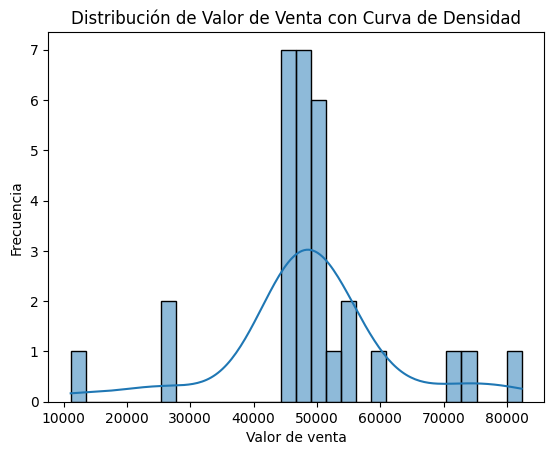

In [58]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

In [59]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [60]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]
productos_top

,producto,valor_venta
3,Auriculares,74175.58
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60
16,Jarrón decorativo,51130.88
19,Lámpara de mesa,82276.38
20,Microondas,72562.89
25,Secadora,52115.45
27,Smartphone,54132.44


## Agregación
Actividad 3 - Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [61]:
df_ventas.columns

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta'],
      dtype='object')

In [62]:
# Agrupamos por categoria y agregamos la suma
ventas_categoria = df_ventas.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


<Axes: title={'center': 'Ventas por Categoría'}, xlabel='categoria'>

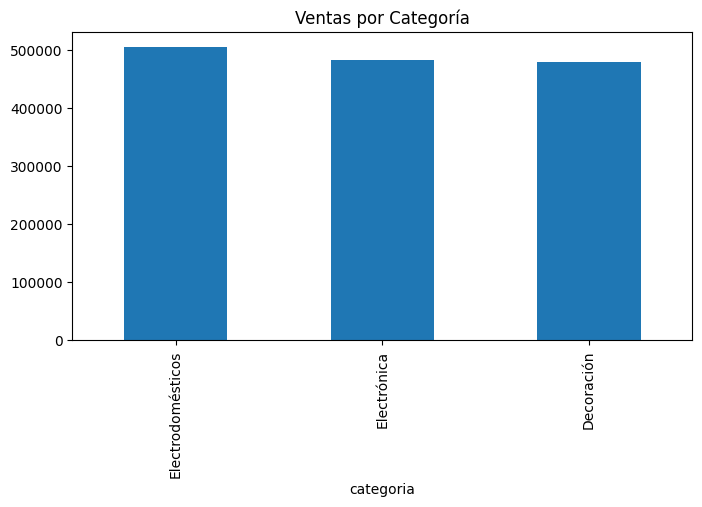

In [63]:
ventas_por_categoria = ventas_categoria.groupby('categoria')['valor_venta'].sum().sort_values(ascending=False)
ventas_por_categoria.plot(kind='bar', figsize=(8,4), title='Ventas por Categoría')

In [64]:
# Renombrar nombre de la columna
ventas_categoria.rename(columns={"valor_venta":"Ventas acumuladas"})

,categoria,Ventas acumuladas
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [65]:
# Ordenar y mostrar los resultados
ventas_categoria["valor_venta"].sort_values(ascending=False)

,valor_venta
1,505299.63
2,482577.80
0,479216.09


## Integración de datos
Actividad 4 - Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [66]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
 6   valor_venta  2998 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 187.4+ KB


In [67]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [68]:
# Vemos la cantidad de productos unicos en ventas
df_ventas["producto"].nunique()

30

In [69]:
# Vemos la cantidad de productos unicos en marketing
df_marketing["producto"].nunique()

30

In [70]:
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84


In [71]:
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [72]:
# Listamos los registros de ventas ordenados por producto ascendiente
df_ventas.sort_values(by="producto", ascending=True )

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
1478,410,Adorno de pared,109.64,3,2024-06-21,Decoración,328.92
2428,620,Adorno de pared,92.16,4,2024-10-21,Decoración,368.64
699,780,Adorno de pared,79.13,7,2024-03-21,Decoración,553.91
257,50,Adorno de pared,83.10,5,2024-01-31,Decoración,415.50
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración,913.32
...,...,...,...,...,...,...,...
1282,2652,Televisor,74.49,4,2024-05-25,Electrónica,297.96
220,2252,Televisor,89.27,8,2024-01-26,Electrónica,714.16
643,2082,Televisor,55.66,3,2024-03-15,Electrónica,166.98
1668,2991,Televisor,92.33,4,2024-07-15,Electrónica,369.32


In [73]:
# Listamos los registros de marketing ordenados por producto ascendiente
df_marketing.sort_values(by=["producto","canal"])

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
8,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10
70,14,Adorno de pared,RRSS,4.16,2024-10-22,2024-12-21
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05
84,28,Alfombra,RRSS,5.82,2024-11-27,2025-01-08
...,...,...,...,...,...,...
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
32,72,Tablet,TV,4.90,2024-07-08,2024-09-03
81,59,Televisor,Email,4.19,2024-11-20,2025-01-19
16,29,Televisor,RRSS,3.96,2024-05-17,2024-06-28


In [74]:
# Para evitar duplicados, habria que agrupar marketing antes de hacer el merge (a costa de perder la fecha)
df_marketing_avg = df_marketing.groupby(["producto"], as_index=False)["costo"].mean()
df_marketing_avg

,producto,costo
0,Adorno de pared,4.683333
1,Alfombra,5.820000
2,Aspiradora,5.486667
3,Auriculares,5.080000
4,Batidora,5.093333
5,Cafetera,6.053333
6,Candelabro,4.883333
7,Consola de videojuegos,4.256667
8,Cortinas,5.786667
9,Cuadro decorativo,5.283333


In [75]:
# Unir los datasets ventas y marketing por columna 'producto'
# Aqui tienen dos caminos, unir ventas con df_marketing que tiene duplicados
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")
# O, unir ventas con df_marketing_avg que no tiene duplicados, pero no tiene fechas
# ventas_marketing = pd.merge(df_ventas, df_marketing_avg, on="producto", how="inner")

In [76]:
# Verificar coincidencias (muestra)
ventas_marketing.sort_values(by=["producto", "precio"], ascending=True)

# Nota1: si unieron ventas con marketing, obtienen 8994 registros
# Nota2: si unieron ventas con marketing_avg obtienen 2998 registros

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
7608,610,Adorno de pared,27.89,8,2024-11-04,Decoración,223.12,74,TV,4.81,2024-03-20,2024-05-03
7609,610,Adorno de pared,27.89,8,2024-11-04,Decoración,223.12,44,Email,5.08,2024-04-13,2024-05-10
7610,610,Adorno de pared,27.89,8,2024-11-04,Decoración,223.12,14,RRSS,4.16,2024-10-22,2024-12-21
1491,150,Adorno de pared,27.92,5,2024-02-28,Decoración,139.60,74,TV,4.81,2024-03-20,2024-05-03
1492,150,Adorno de pared,27.92,5,2024-02-28,Decoración,139.60,44,Email,5.08,2024-04-13,2024-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...
4246,2552,Televisor,122.59,7,2024-06-11,Electrónica,858.13,59,Email,4.19,2024-11-20,2025-01-19
4247,2552,Televisor,122.59,7,2024-06-11,Electrónica,858.13,89,TV,4.98,2024-12-13,2025-02-08
1578,2572,Televisor,123.48,7,2024-03-02,Electrónica,864.36,29,RRSS,3.96,2024-05-17,2024-06-28
1579,2572,Televisor,123.48,7,2024-03-02,Electrónica,864.36,59,Email,4.19,2024-11-20,2025-01-19


In [77]:
ventas_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8994 entries, 0 to 8993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_venta      8994 non-null   int64         
 1   producto      8994 non-null   object        
 2   precio        8994 non-null   float64       
 3   cantidad      8994 non-null   int64         
 4   fecha_venta   8994 non-null   datetime64[ns]
 5   categoria     8994 non-null   object        
 6   valor_venta   8994 non-null   float64       
 7   id_campanha   8994 non-null   int64         
 8   canal         8994 non-null   object        
 9   costo         8994 non-null   float64       
 10  fecha_inicio  8994 non-null   datetime64[ns]
 11  fecha_fin     8994 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(3), object(3)
memory usage: 843.3+ KB


In [78]:
ventas_marketing.sample()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
6167,2015,Auriculares,87.91,5,2024-09-01,Electrónica,439.55,77,TV,4.99,2024-11-11,2024-12-06


In [79]:
ventas_marketing.groupby("categoria")[["valor_venta","costo"]].sum()

,valor_venta,costo
categoria,,
Decoración,1437648.27,15774.86
Electrodomésticos,1515898.89,14644.65
Electrónica,1447733.40,14243.90


### Analizamos el impacto de la campaña

In [80]:
ganancias_marketing = ventas_marketing[["producto", "valor_venta", "costo"]]
ganancias_marketing.head()

,producto,valor_venta,costo
0,Cuadro decorativo,349.7,5.27
1,Cuadro decorativo,349.7,5.28
2,Cuadro decorativo,349.7,5.30
3,Lámpara de mesa,525.5,5.54
4,Lámpara de mesa,525.5,5.88


In [81]:
# Nos quedamos solo con los registros de ventas durante la campaña de marketing
  # Nota: si se trabaja con el dataframe marketing se puede aplicar el filtro,
  # si se trabaja con dataframe marketing_avg, al no tener fecha, no aplicar el filtro.

ganancias_marketing = ventas_marketing.query("fecha_venta > fecha_inicio & fecha_venta < fecha_fin")

# Seleccionamos solo los campos que nos interesan: "producto", "valor_venta", "costo"
ganancias_marketing = ganancias_marketing[["producto", "valor_venta", "costo"]]
ganancias_marketing.sort_values(by="producto", ascending=True)

,producto,valor_venta,costo
2091,Adorno de pared,553.91,4.81
8645,Adorno de pared,745.52,4.16
2586,Adorno de pared,264.00,4.81
8450,Adorno de pared,206.10,4.16
8318,Adorno de pared,773.08,4.16
...,...,...,...
8666,Televisor,101.58,4.98
8665,Televisor,101.58,4.19
8425,Televisor,597.74,4.19
3684,Televisor,415.80,3.96


In [82]:
# Agrupamos por producto y hacemos una agregación por "valor de venta" y "costo"
ganancias_marketing = ganancias_marketing.groupby("producto")[["valor_venta","costo"]].sum()
ganancias_marketing

,valor_venta,costo
producto,,
Adorno de pared,15110.72,129.80
Alfombra,14786.14,172.57
Aspiradora,12844.78,163.92
Auriculares,19840.99,201.70
Batidora,22137.37,212.08
Cafetera,14459.17,160.84
Candelabro,5700.53,63.08
Consola de videojuegos,7785.49,68.69
Cortinas,14623.15,166.43


In [83]:
# Generamos una nueva columna con la diferencia entre lo vendido y lo invertido en la campaña
ganancias_marketing["ganancia_neta"] = ganancias_marketing['valor_venta']-ganancias_marketing['costo']
ganancias_marketing=ganancias_marketing.sort_values(by="ganancia_neta", ascending=False)

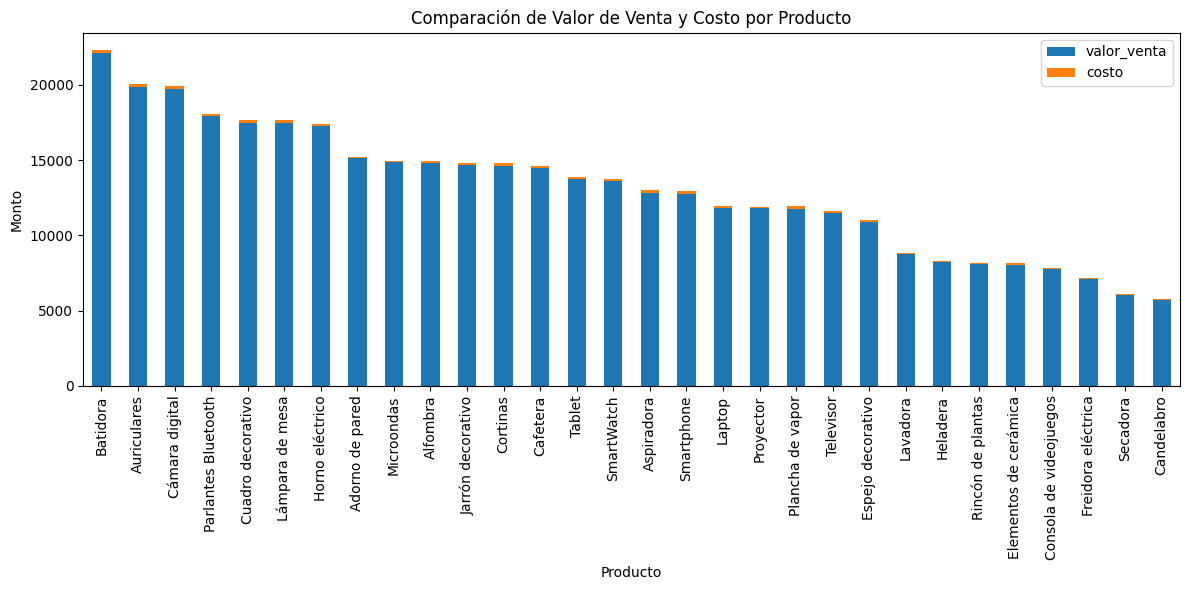

In [84]:
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto
ganancias_marketing[["valor_venta", "costo"]].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Comparación de Valor de Venta y Costo por Producto")
plt.xlabel("Producto")
plt.ylabel("Monto")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Solución al problema de los duplicados

In [85]:
# Hacemos el merge entre marketing y ventas por columna producto
marketing_ventas = pd.merge(df_marketing, df_ventas, on="producto", how="inner")
marketing_ventas.sort_values(by="producto", ascending=True)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,id_venta,precio,cantidad,fecha_venta,categoria,valor_venta
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,630,71.99,9,2024-01-04,Decoración,647.91
907,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10,280,29.81,9,2024-09-01,Decoración,268.29
906,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10,480,117.68,10,2024-08-28,Decoración,1176.80
905,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10,450,79.85,6,2024-08-24,Decoración,479.10
904,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10,230,88.01,1,2024-08-23,Decoración,88.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,29,Televisor,RRSS,3.96,2024-05-17,2024-06-28,2782,62.80,8,2024-02-15,Electrónica,502.40
1590,29,Televisor,RRSS,3.96,2024-05-17,2024-06-28,2122,97.30,9,2024-02-12,Electrónica,875.70
1589,29,Televisor,RRSS,3.96,2024-05-17,2024-06-28,2952,112.58,5,2024-02-11,Electrónica,562.90
8621,89,Televisor,TV,4.98,2024-12-13,2025-02-08,2912,42.72,1,2024-03-26,Electrónica,42.72


In [86]:
# filtramos solo aquellos productos que se hayan vendido dentro de la campaña
marketing_ventas_pp1 = marketing_ventas.query("fecha_venta > fecha_inicio & fecha_venta < fecha_fin")

In [87]:
# Calculamos el total_ventas por producto haciendo valor_venta * cantidad
marketing_ventas_pp2 = marketing_ventas_pp1.copy() # para eliminar la advertencia
marketing_ventas_pp2["total_venta"] = (
    marketing_ventas_pp2["valor_venta"] * marketing_ventas_pp2["cantidad"]
)


In [88]:
# Agrupamos el dataframe por producto usando .agg
# Agregar total_venta como el promedio, elimina el impacto de los datos duplicados
# Y seguimos agegando costo como la suma de lo invertido en cada canal
ganancias_marketing = marketing_ventas_pp2.groupby("producto").agg(
    {
        "total_venta": "mean",
        "costo": "sum",
    }
)

In [89]:
# A partir de venta_total y costo, calculamos la ganancia obtenida
ganancias_marketing["ganancia"]= ganancias_marketing["total_venta"]-ganancias_marketing["costo"]
ganancias_marketing = ganancias_marketing.sort_values(by="ganancia", ascending=False)
ganancias_marketing.head(3)

,total_venta,costo,ganancia
producto,,,
Microondas,6164.674783,104.89,6059.784783
Heladera,5786.587143,60.12,5726.467143
Cafetera,5388.738000,160.84,5227.898000


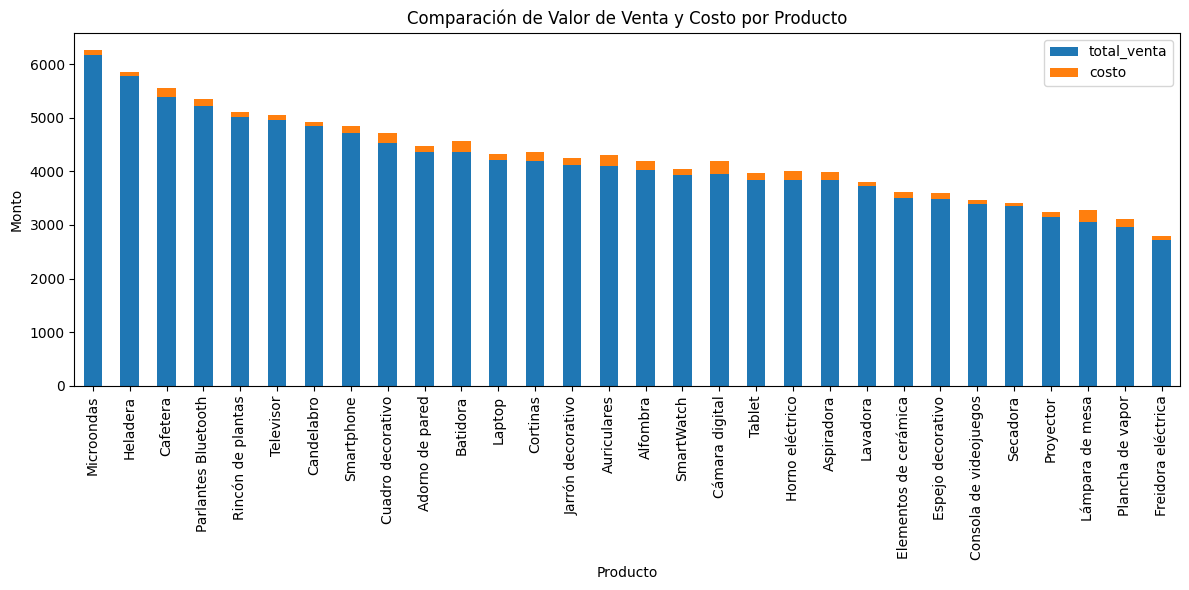

In [90]:
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto
ganancias_marketing[["total_venta", "costo"]].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Comparación de Valor de Venta y Costo por Producto")
plt.xlabel("Producto")
plt.ylabel("Monto")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Ahora en el gráfico los costos de campañas de marketing son más signficativos ya que se toman los productos vendidos durante la campaña.

# **Entrega Final**

# Etapa 3 - Análisis de Datos

Objetivo: Realizar análisis estadístico y exploratorio sobre los datos procesados.
sobre:
* df_ventas
* df_marketing

## 1 - Estadística Descriptiva

Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe

En la Etapa 2 - Limpieza de datos, obtuvimos los dataframes:

* df_ventas
* df_marketing

Usamos el método describe para obtener un resumen de las:
* Medidas de posición
* Medidas de dispersión o variabilidad


In [91]:
# Dataframe ventas
df_ventas[["precio", "cantidad", "valor_venta"]].describe()
# df_ventas.describe()

,precio,cantidad,valor_venta
count,2998.000000,2998.000000,2998.000000
mean,75.291318,6.502668,489.357412
std,28.736008,3.455107,334.281817
min,26.000000,1.000000,26.300000
25%,50.030000,3.000000,220.920000
50%,75.205000,7.000000,418.065000
75%,100.067500,9.000000,709.920000
max,124.970000,12.000000,1488.120000


In [92]:
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [93]:
# Dataframe marketing
# agrupo por canal y sumarizo el costo
df_marketing.groupby("canal")["costo"].describe()

,count,mean,std,min,25%,50%,75%,max
canal,,,,,,,,
Email,30.0,4.840000,0.898773,2.95,4.2125,4.895,5.5075,6.84
RRSS,30.0,5.030333,0.894101,3.16,4.5600,5.130,5.5425,7.16
TV,30.0,4.915667,1.063215,3.06,4.3725,4.795,5.5400,7.39


## 2 - EDA (Análisis Exploratorio de Datos)

Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

### Gráficos histogramas

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

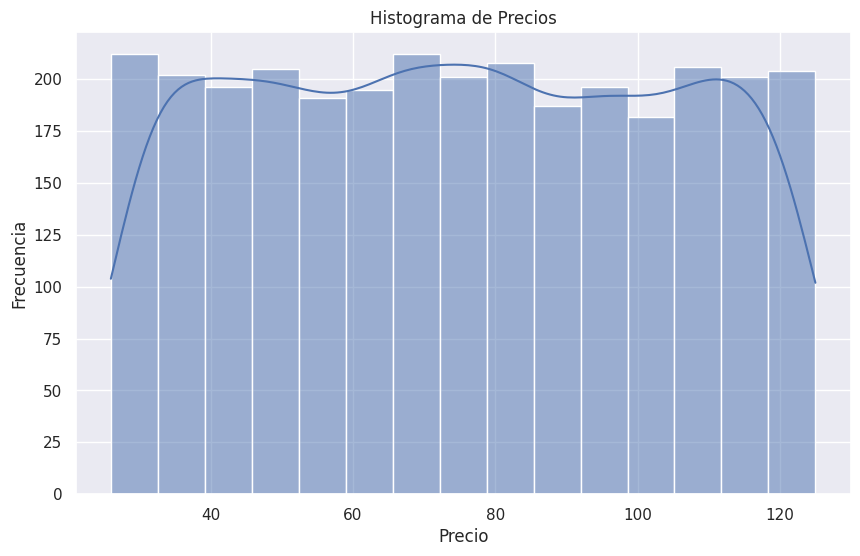

In [95]:
# Histograma de precios utilizando seaborn

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="precio", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

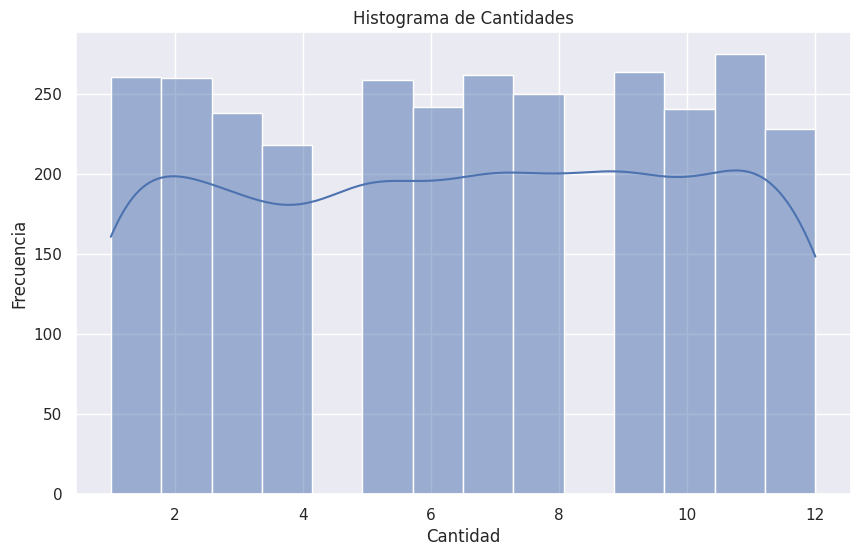

In [96]:
# Histograma cantidades

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="cantidad", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Cantidades")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()


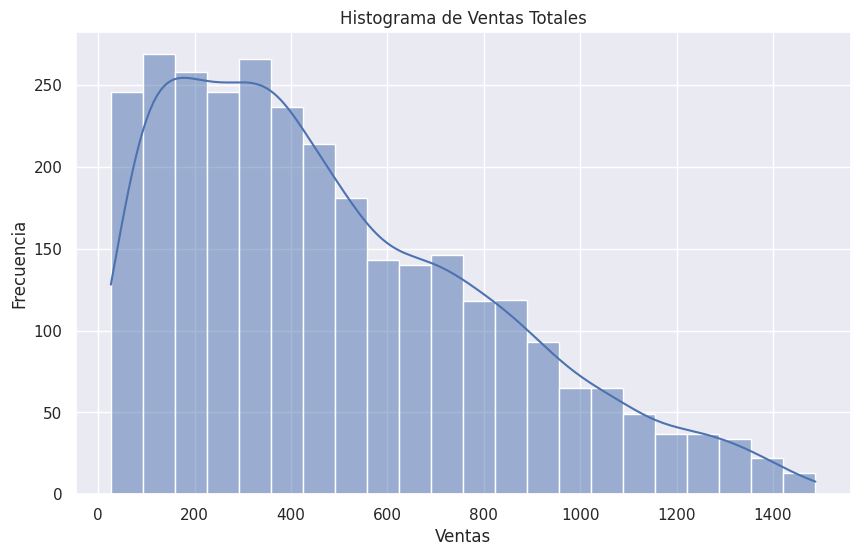

In [97]:
# Histograma ventas_totales

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="valor_venta", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Ventas Totales")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()



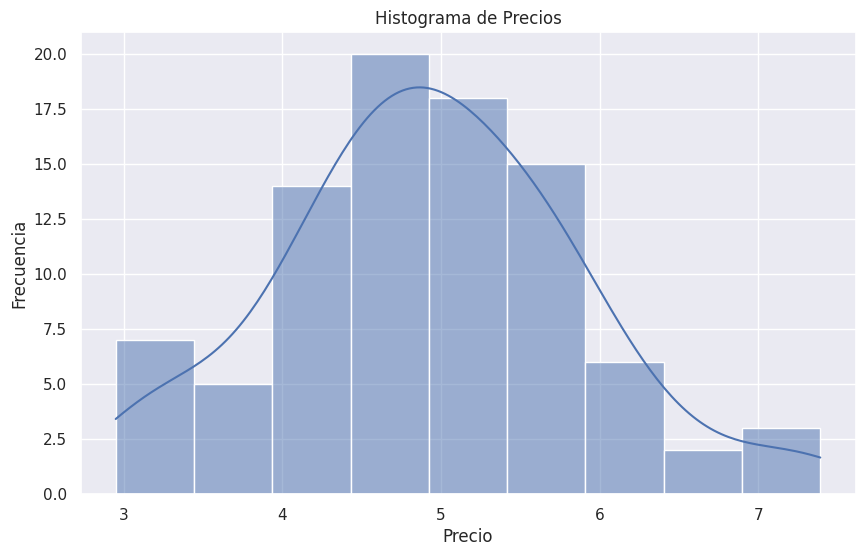

In [98]:
# Histograma costo marketing

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_marketing, x="costo", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


### Gráficos Boxplot

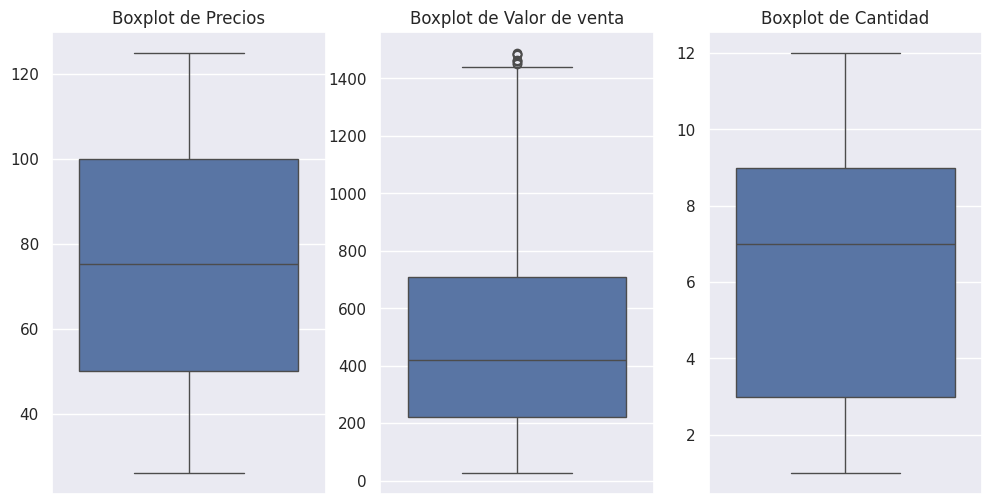

In [99]:
# Boxplot Ventas

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(12, 6)) #ancho x alto = resolucion

# Subplots, dividen al lienzo en partes
plt.subplot(1,3,1) # (1,3,1) => (1 fila, 3 columans, bloque 1)

# Subplot 1
sns.boxplot(data=df_ventas, y="precio")
plt.title("Boxplot de Precios")
plt.ylabel("")

# Subplot 2
plt.subplot(1,3,2) # (1,3,2) => (1 fila, 3 columans, bloque 2)
sns.boxplot(data=df_ventas, y="valor_venta")
plt.title("Boxplot de Valor de venta")
plt.ylabel("")


# Subplot 3
plt.subplot(1,3,3) # (1,3,3) => (1 fila, 3 columans, bloque 3)
sns.boxplot(data=df_ventas, y="cantidad")
plt.title("Boxplot de Cantidad")
plt.ylabel("")

plt.show()



Observaciones:
* El 50% de los datos se encuentra dentro del box

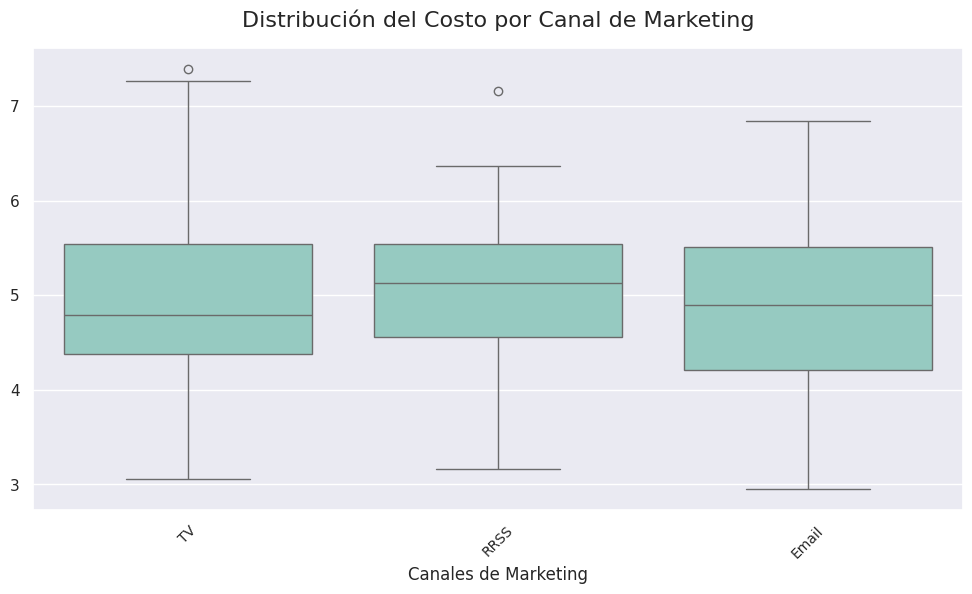

In [100]:
# Boxplot marketing

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="Set3") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(12, 6))

# Graficamos
sns.boxplot(data=df_marketing, x="canal", y="costo")
# sns.boxplot(data=df_marketing, y="costo") # asi grafico costo para todos los canales

# Título y subtítulo
plt.title("Distribución del Costo por Canal de Marketing", fontsize=16, pad=15)

plt.xlabel("Canales de Marketing", fontsize=12)
plt.ylabel("")

# Rotación y tamaño de labels del eje X
plt.xticks(rotation=45, fontsize=10)

plt.show()



## 3 - Correlación

Aplicado a variables numéricas

### Matriz de correlación

In [101]:
# Primero calculamos la matríz de correlación usando las variables numéricas
correlacion = df_ventas[['precio', 'cantidad', 'valor_venta']].corr() #.corr() calcula la matriz de correlacion
print("\nMatriz de correlación:")
print(correlacion)


Matriz de correlación:
               precio  cantidad  valor_venta
precio       1.000000 -0.002388     0.558846
cantidad    -0.002388  1.000000     0.773009
valor_venta  0.558846  0.773009     1.000000


Observaciones:
* No hay relacion entre el precio y la cantidad ya que la variable se acerca a 0
* En relacion a la cantidad y el valor de venta hay una correlacion moderada

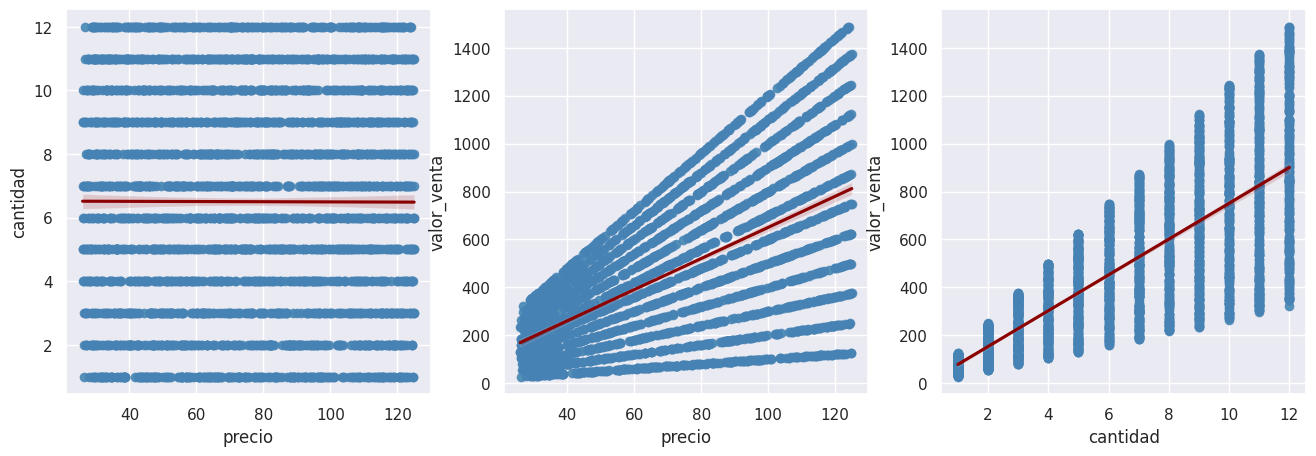

In [102]:
# Representamos las variables en un scatterplot o gráfico de dispersión
#agregamos una línea de tendencia

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df_ventas, x="precio", y="cantidad")
# agregamos una linea de regresion
sns.regplot(
    data=df_ventas,
    x="precio",
    y="cantidad",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)

plt.subplot(1,3,2)
sns.scatterplot(data=df_ventas, x="precio", y="valor_venta")
sns.regplot(
    data=df_ventas,
    x="precio",
    y="valor_venta",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)

plt.subplot(1,3,3)
sns.scatterplot(data=df_ventas, x="cantidad", y="valor_venta")
sns.regplot(
    data=df_ventas,
    x="cantidad",
    y="valor_venta",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)


plt.show()

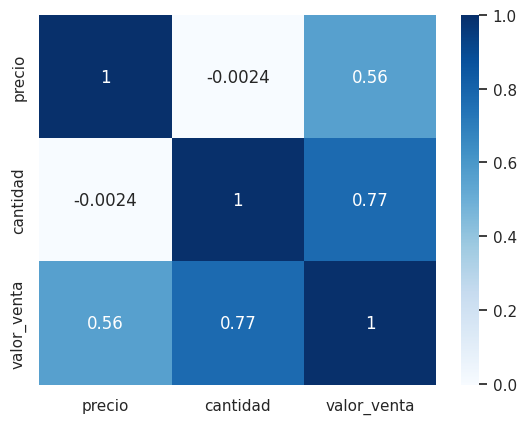

In [103]:
# Creamos un mapa de calor para representar la matríz de correlación
sns.heatmap(correlacion, annot=True, cmap="Blues") # cmap = Blues, Greens, rocket
plt.show()

## 4 - Consolidación de datos

Consolidar todos los análisis previos y preparar un conjunto de datos final que resuma los hallazgos clave para la presentación.

<BR>
Aquí intervienen los KPIs, esto es, cuáles son las métricas que le interesan al negocio.

KPIs:
* Importe total de ventas concretado por mes
* Cantidad de productos totales vendidos por mes
* Volumen de venta por categorías
* Impacto de la campaña de marketing en las ventas
* Cantidad de ganancias por producto por año
* Producto de menores ventas pero mayores ingresos
* Mes con mas ingresos y mayor cantidad de ventas

### Importe total de ventas concretado por mes

In [114]:
# Corramos un head para recordar el dataframe
df_ventas.head(15)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,mes,anio
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,1,2024
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,1,2024
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,1,2024
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,1,2024
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,1,2024
5,1697,Horno eléctrico,35.35,9,2024-01-02,Electrodomésticos,318.15,1,2024
6,1710,Plancha de vapor,65.43,2,2024-01-02,Electrodomésticos,130.86,1,2024
7,2959,Proyector,88.17,9,2024-01-02,Electrónica,793.53,1,2024
8,318,Rincón de plantas,79.86,11,2024-01-03,Decoración,878.46,1,2024
9,419,Candelabro,66.11,8,2024-01-03,Decoración,528.88,1,2024


In [105]:
# Generamos primero la columna mes
df_ventas["mes"] = df_ventas["fecha_venta"].dt.month
df_ventas["anio"] = df_ventas["fecha_venta"].dt.year

# Agrupamos por mes y agregamos por valor_venta
ventas_mes = df_ventas.groupby("mes", as_index=False).agg(
    ventas_mes=("valor_venta", "sum")
)

# Renombramos la columna si fuera necesario
# ventas_mes = ventas_mes.rename(columns={
#     "mes": "mes",
#     "ventas_totales": "ventas_totales"
# })

# Visualizamos
ventas_mes.head(12)

,mes,ventas_mes
0,1,129604.99
1,2,118672.44
2,3,136779.15
3,4,128430.69
4,5,143727.25
5,6,108480.17
6,7,116229.97
7,8,119680.15
8,9,115787.85
9,10,112117.13


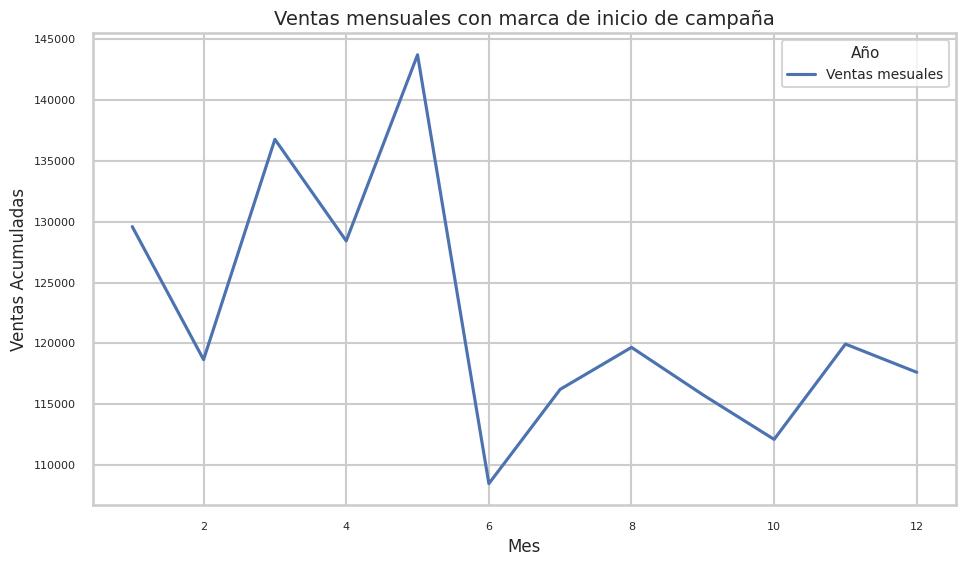

In [106]:
# Generamos un gráfico de lineas (serie de tiempo)
# que muestre la evolución de las ventas en el año (2024 por mes)
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set_theme(style="whitegrid", context="talk")
custom_palette = sns.color_palette("Set2") # Aqui pueden cambiar a "Set1", "Set2", "Set3"

# Definimos el tamaño del lienzo
plt.figure(figsize=(10,6))

# Graficamos
sns.lineplot(data=ventas_mes, x="mes", y="ventas_mes", label="Ventas mesuales" )

# Ticks (valores de eje)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title('Ventas mensuales con marca de inicio de campaña', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Acumuladas', fontsize=12)
plt.legend(title='Año', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

Observaciones:
-- observamos cque el mes de Junio hubo una caída en las ventas



### Cantidad de productos totales vendidos por mes

In [107]:
# Agrupamos por mes y agregamos por cantidad
cantidades_mes = df_ventas.groupby("mes", as_index=False).agg(
    cantidad_mes=("cantidad", "sum")
)

# Visualizamos
cantidades_mes.head()

,mes,cantidad_mes
0,1,1741
1,2,1607
2,3,1792
3,4,1715
4,5,1812


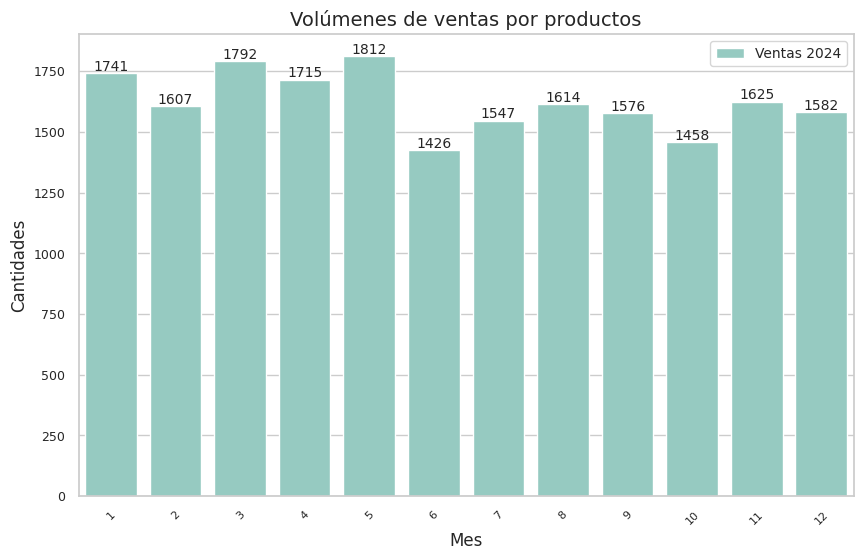

In [108]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos tamaño del lienzo
plt.figure(figsize=(10,6))

# Crear el barplot
ax = sns.barplot(data=cantidades_mes, x='mes', y='cantidad_mes', label="Ventas 2024", width=0.8)

# Agregar etiquetas arriba de las barras
for i, valor in enumerate(cantidades_mes['cantidad_mes']):
    ax.text(
        i,                       # posición x de la etiqueta
        valor + 10,                   # posición y (ligeramente arriba de la barra)
        str(valor),              # texto
        ha='center', fontsize=10
    )

# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x', rotation=45,  labelsize=8)

# Ajustes de título y ejes
plt.title('Volúmenes de ventas por productos', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidades')
plt.legend(loc='upper right', fontsize=10)
# plt.tight_layout() # ajuste automatico
plt.show()

Observaciones:
* En el mes 6 la cantidad de productos vendidos no bajo en gran medido, por lo que intuimos que se vendieron productos mas económicos

### Volumen de venta por categorías

In [109]:
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,mes,anio
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,1,2024
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,1,2024
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,1,2024
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,1,2024
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,1,2024


In [110]:
# Agrupamos por categoría y agregamos por valor_venta
ventas_categoria = df_ventas.groupby("categoria", as_index=False).agg(
    ventas_totales=("valor_venta", "sum")
)

# Visualizamos
ventas_categoria.head()

,categoria,ventas_totales
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


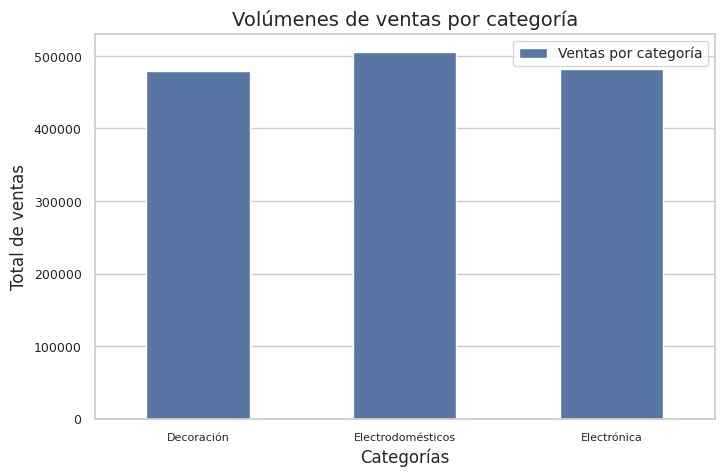

In [111]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="deep"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos tamaño del lienzo
plt.figure(figsize=(8,5))

# Crear el barplot
ax = sns.barplot(data=ventas_categoria, x='categoria', y='ventas_totales', label="Ventas por categoría", width=0.5)


# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x', labelsize=8)

# Ajustes de título y ejes
plt.title('Volúmenes de ventas por categoría', fontsize=14)
plt.xlabel('Categorías')
plt.ylabel('Total de ventas')
plt.legend(loc='upper right', fontsize=10)
# plt.tight_layout() # ajuste automatico
plt.show()

### Impacto de la campaña de marketing en las ventas I

Trazamos una linea vertical al primer grafico ventas por mes

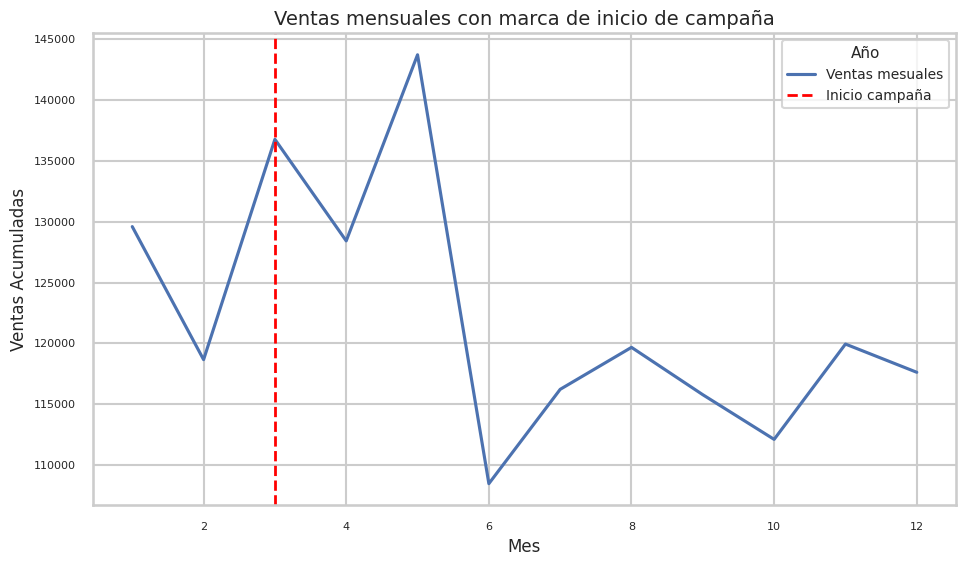

In [112]:
# Generamos un gráfico de lineas (serie de tiempo)
# que muestre la evolución de las ventas en el año (2024 por mes)
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set_theme(style="whitegrid", context="talk")
custom_palette = sns.color_palette("Set2") # Aqui pueden cambiar a "Set1", "Set2", "Set3"

# Definimos el tamaño del lienzo
plt.figure(figsize=(10,6))

# Graficamos
sns.lineplot(data=ventas_mes, x="mes", y="ventas_mes", label="Ventas mesuales" )

# línea vertical que marque el inicio de campaña
plt.axvline(3, color="red", linewidth=2, linestyle="--",
            label="Inicio campaña")

# Ticks (valores de eje)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title('Ventas mensuales con marca de inicio de campaña', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Acumuladas', fontsize=12)
plt.legend(title='Año', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

### Impacto de la campaña de marketing en las ventas II

Revisar la sección Etaoa 2 - Integración de datos
Allí, luego de unir los dataframes df_ventas con df_marketing, se generan 2 dataframes independientes, cada uno conteniendo las ventas que se hicieron dentro de algún período de marketing, y otro con las ventas que se realizaron fuera de camapaña.
<BR>
Así surgen:
* ventas_con_marketing_final
* ventas_sin_marketing_final

In [113]:
ventas_con_marketing_final.head()

NameError: name 'ventas_con_marketing_final' is not defined

In [ ]:
ventas_sin_marketing_final.head()

In [ ]:
ventas_con_sin_marketing = pd.merge(ventas_con_marketing_final, ventas_sin_marketing_final, on="producto", how="inner")
ventas_con_sin_marketing = ventas_con_sin_marketing.sort_values(by=["ventas_producto_cm"], ascending=False)
ventas_con_sin_marketing.head()

In [ ]:
# Transformar a formato largo
df_long = ventas_con_sin_marketing[["producto","ventas_producto_cm", "ventas_producto_sm"]]
df_long = df_long.melt(id_vars="producto",
                        var_name="modalidad",
                        value_name="valores")
# df_long = df_long.sort_values(by=["valores", "modalidad"], ascending=True)
df_long.head()

In [ ]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos el lienzo
plt.figure(figsize=(8,5))

# Graficamos
sns.barplot(data=df_long, x="producto", y="valores", hue="modalidad", width=0.8)
# sns.barplot(data=df_long, x="Trimestre", y="Ventas", hue="Producto", width=0.8) Invertimos Productos por Trimestre


# Ticks (valores de eje)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title('Ventas totales por productos dentro y fuera de campaña', fontsize=14)
plt.xlabel('Productos')
plt.ylabel('Ventas')

# Obtener handles (cuadritos de color) y labels originales del gráfico
handles, labels = plt.gca().get_legend_handles_labels()

# Reemplazar solo los textos de la leyenda, manteniendo colores
plt.legend(
    handles,
    ["Fuera de campaña", "Dentro de campaña"],
    title="Modalidad",
    fontsize=9,
    title_fontsize=10
)
plt.tight_layout()

In [ ]:
ventas_marketing.head()

In [ ]:
df_test = ventas_marketing.groupby(["id_venta", "producto"]).agg(
    {"valor_venta": "first"})
df_test1 = df_test.groupby("producto").agg(
    {"valor_venta": "sum"})

df_test2 = df_test1.sort_values(by="valor_venta", ascending=False)
df_test2.head()

In [ ]:
# Visualización con Plotly

# Anexo

Links importantes:

* Repo Github - https://github.com/marianovanini/TT-2C2025-Data-Analitycs-Notebooks/tree/main/Pre%20entrega
* Drive - https://drive.google.com/drive/folders/1o1h3P-s2V9AQoKMptTzfbXas3SkDX3p0?usp=sharing
